In [7]:
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches
import statsmodels.sandbox.stats.multicomp

ImportError: DLL load failed: %1 is not a valid Win32 application.

In [4]:
%matplotlib inline
sns.set_style("white")
from IPython.core.pylabtools import figsize

ImportError: DLL load failed: %1 is not a valid Win32 application.

# Load linkage map

In [ ]:
linkage_map = pd.read_csv(os.path.join('linkage_map', 'LEPmap', 'with_paralogs', 'final', 'PS_chum_map_2015.txt'), sep = '\t')
linkage_map = linkage_map[['contig', 'resolved_locus', 'stacks_CatID', 'stacks_SNP', 'LEP_LG', 'cM']]
linkage_map = linkage_map.rename(columns = {'resolved_locus':'locus', 'LEP_LG':'LG'})
linkage_map.head(3)

In [ ]:
 ### Get the Bayescan ID for each locus

In [ ]:
# in the output from plink, column 2 is what we want
stacks_SNPs = pd.read_csv(os.path.join('results', 'batch_4', 'pop_analysis', 'bayescan', 'non_paralogs.map'),                        
            header = None, sep = '\t')
stacks_SNPs.columns =  ['ignore1', 'stacks_SNP', 'ignore2', 'ignore3']
stacks_SNPs['BSname'] = stacks_SNPs.index + 1
stacks_SNPs = stacks_SNPs[['stacks_SNP', 'BSname']]
stacks_SNPs.head(3)

In [ ]:
lmap_BSnames = pd.merge(linkage_map, stacks_SNPs, how='outer')
lmap_BSnames.head()

In [ ]:
len(lmap_BSnames)

## Load Bayescan results

In [ ]:
group_2_fst_file = os.path.join('results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_2.baye_fst.txt')

def load_baye_fst(filename):
    baye_fst = pd.read_csv(filename, sep = " ", skiprows=1, header = None, skipinitialspace=True)
    baye_fst.columns = ['BSname','prob_bayescan','log10(PO)_bayescan','qval_bayescan','alpha_bayescan','Fst_bayescan', 'junk']
    baye_fst = baye_fst[['BSname','prob_bayescan','log10(PO)_bayescan','qval_bayescan','alpha_bayescan','Fst_bayescan']]
    baye_fst['mlog10(qval)_bayescan'] = -np.log10(baye_fst['qval_bayescan'])

    return(baye_fst)

BS_2 = load_baye_fst(group_2_fst_file)
BS_2.head()

In [ ]:
lmap_BS = pd.merge(lmap_BSnames, BS_2, how = 'outer')
lmap_BS.head()

In [ ]:
lmap_BS

## Combine with Weir (1984) Fst

In [40]:
plink_fst = pd.read_csv(os.path.join('data', 'batch_4', 'pop_genotypes', 'non_paralogs.fst'), sep = "\t")
plink_fst= plink_fst.rename(columns = {'SNP':'stacks_SNP', 'FST':'Fst_weir'})
plink_fst = plink_fst[['stacks_SNP','Fst_weir']]
plink_fst.head()

stacks_SNP  Fst_weir
0     1013_6  0.015589
1     2062_6 -0.002161
2     2574_6  0.017541
3     2741_6 -0.005708
4     4096_6  0.010227

In [41]:
lmap_BS_FST = pd.merge(lmap_BS,plink_fst, how = 'outer') 

## Combine with LFMM statistics

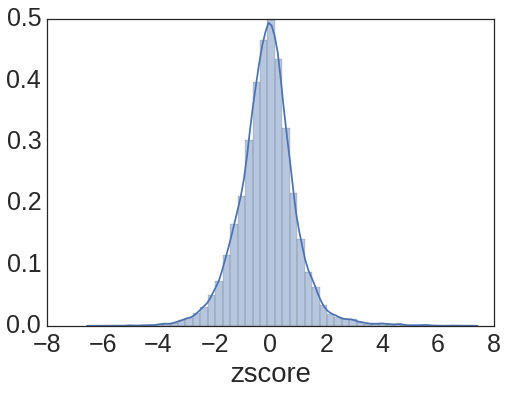

In [323]:
# get for duplicated loci
lfmm_dom = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/LFMM/lfmm_results.dom.txt', sep = '\t')
lfmm_dom.head()
sns.distplot(lfmm_dom['zscore'])
plt.show()

748

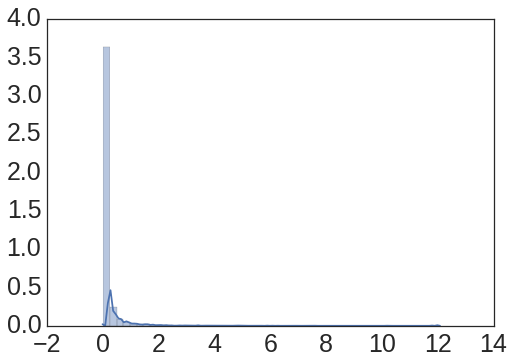

In [324]:
reject_null, fdr_pval, alphacSidak, alphacBonf = statsmodels.sandbox.stats.multicomp.multipletests(lfmm_dom['cpvals'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
lfmm_dom['reject_null_LFMM'] = reject_null
lfmm_dom['fdr_pval_LFMM'] = fdr_pval
lfmm_dom['mlog10(fdr_pval)_LFMM'] = -np.log10(lfmm_dom['fdr_pval_LFMM'] )
sns.distplot(lfmm_dom['mlog10(fdr_pval)_LFMM'].values)
lfmm_dom.head()
np.sum(lfmm_dom['reject_null_LFMM'])

## non-duplicated loci

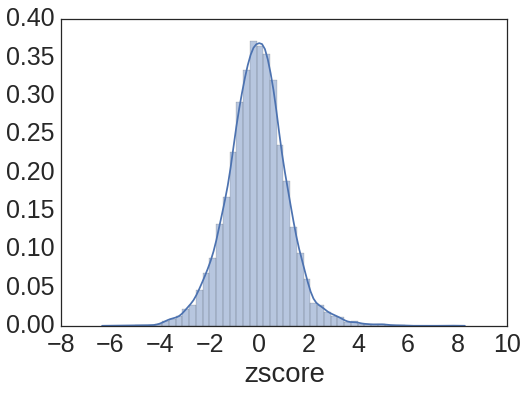

In [317]:
lfmm = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/LFMM/lfmm_results.txt', sep = '\t')
lfmm.head()
sns.distplot(lfmm['zscore'])
max(lfmm['zscore'])
plt.show()


Apply FDR correction

53

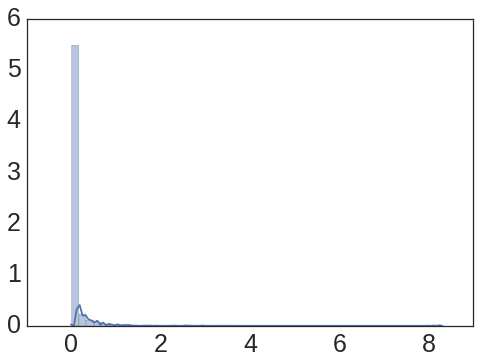

In [325]:
reject_null, fdr_pval, alphacSidak, alphacBonf = statsmodels.sandbox.stats.multicomp.multipletests(lfmm['cpvals'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
lfmm['reject_null_LFMM'] = reject_null
lfmm['fdr_pval_LFMM'] = fdr_pval
lfmm['mlog10(fdr_pval)_LFMM'] = -np.log10(lfmm['fdr_pval_LFMM'] )
sns.distplot(lfmm['mlog10(fdr_pval)_LFMM'].values)
lfmm.head()
np.sum(lfmm['reject_null_LFMM'])

In [205]:
lmap_BS_FST_LFMM = pd.merge(lmap_BS_FST, lfmm, how = 'outer', left_on='BSname', right_on='locnum')
lmap_BS_FST_LFMM.head()

contig  locus  stacks_CatID stacks_SNP  LG  cM  BSname  prob_bayescan  \
0   c4311   4311         28282   28282_88   1   0    6440       0.074607   
1   c4311   4311         28282   28282_91   1   0     NaN            NaN   
2  c56875  56875         39970   39970_17   1   0     NaN            NaN   
3  c56875  56875         39970   39970_33   1   0     NaN            NaN   
4  c56875  56875         39970   39970_49   1   0     NaN            NaN   

   log10(PO)_bayescan  qval_bayescan          ...            Fst_bayescan  \
0             -1.0935        0.87532          ...                0.028428   
1                 NaN            NaN          ...                     NaN   
2                 NaN            NaN          ...                     NaN   
3                 NaN            NaN          ...                     NaN   
4                 NaN            NaN          ...                     NaN   

   mlog10(qval)_bayescan  Fst_weir  locnum    cpvals    zscore  reject_null  \
0               0.057833  0.013742    6440  0.567927 -0.612083        False   
1                    NaN       NaN     NaN       NaN       NaN          NaN   
2                    NaN       NaN     NaN       NaN       NaN          NaN   
3                    NaN       NaN     NaN       NaN       NaN          NaN   
4                    NaN       NaN     NaN       NaN       NaN          NaN   

  reject_null_LFMM fdr_pval_LFMM  mlog10(fdr_pval)_LFMM  
0            False      0.995929               0.001772  
1              NaN           NaN                    NaN  
2              NaN           NaN                    NaN  
3              NaN           NaN                    NaN  
4              NaN           NaN                    NaN  

[5 rows x 21 columns]

# Select only loci on linkage map and scored for population genetic stats

In [297]:
lmap_BS_FST_LFMM = lmap_BS_FST_LFMM[lmap_BS_FST_LFMM['LG'].notnull()]
lmap_BS_FST_LFMM = lmap_BS_FST_LFMM[lmap_BS_FST_LFMM['BSname'].notnull()]
lmap_BS_FST_LFMM.head()

contig  locus  stacks_CatID stacks_SNP  LG  cM  BSname  prob_bayescan  \
0      c4311   4311         28282   28282_88   1   0    6440       0.074607   
6665  c56875  56875         39970   39970_60   1   0    6348       0.070007   
6666  c54045  54045         37579   37579_17   1   0    6197       0.069907   
6667   c2167   2167         10293    10293_9   1   0    6162       0.075208   
6668  c69918  69918         50820    50820_7   1   0    6154       0.069207   

      log10(PO)_bayescan  qval_bayescan          ...            Fst_bayescan  \
0                -1.0935        0.87532          ...                0.028428   
6665             -1.1233        0.88464          ...                0.027983   
6666             -1.1240        0.88481          ...                0.028735   
6667             -1.0898        0.87376          ...                0.028102   
6668             -1.1287        0.88562          ...                0.027949   

      mlog10(qval)_bayescan  Fst_weir  locnum    cpvals    zscore  \
0                  0.057833  0.013742    6440  0.567927 -0.612083   
6665               0.053233  0.016345    6348  0.245650  1.244280   
6666               0.053150  0.028103    6197  0.761393 -0.325439   
6667               0.058608  0.014312    6162  0.502838  0.718105   
6668               0.052753  0.015249    6154  0.371955  0.956875   

      reject_null reject_null_LFMM fdr_pval_LFMM  mlog10(fdr_pval)_LFMM  
0           False            False      0.995929               0.001772  
6665        False            False      0.937707               0.027933  
6666        False            False      0.997092               0.001265  
6667        False            False      0.995929               0.001772  
6668        False            False      0.977007               0.010102  

[5 rows x 21 columns]

## Add 20cM between linkage groups - easier to visualize

In [207]:
cumpos = pd.DataFrame(lmap_BS_FST_LFMM.groupby('LG')['cM'].max().cumsum())
cumpos.index = cumpos.index+1
cumpos.set_value(1, 'cM', 0)
cumpos = cumpos.sort_index()
cumpos['cM_pad'] = cumpos['cM'] + np.arange(0,750, 20)
cumpos = cumpos[['cM_pad']]
cumpos.head()

cM_pad
LG        
1     0.00
2   126.08
3   248.38
4   385.34
5   524.82

In [208]:
genome_stats = pd.merge(lmap_BS_FST_LFMM, cumpos, right_index=True, left_on = 'LG')
genome_stats['cM_padded'] = genome_stats['cM'] + genome_stats['cM_pad']

genome_stats.head()

contig  locus  stacks_CatID stacks_SNP  LG  cM  BSname  prob_bayescan  \
0      c4311   4311         28282   28282_88   1   0    6440       0.074607   
6665  c56875  56875         39970   39970_60   1   0    6348       0.070007   
6666  c54045  54045         37579   37579_17   1   0    6197       0.069907   
6667   c2167   2167         10293    10293_9   1   0    6162       0.075208   
6668  c69918  69918         50820    50820_7   1   0    6154       0.069207   

      log10(PO)_bayescan  qval_bayescan    ...      Fst_weir  locnum  \
0                -1.0935        0.87532    ...      0.013742    6440   
6665             -1.1233        0.88464    ...      0.016345    6348   
6666             -1.1240        0.88481    ...      0.028103    6197   
6667             -1.0898        0.87376    ...      0.014312    6162   
6668             -1.1287        0.88562    ...      0.015249    6154   

        cpvals    zscore  reject_null  reject_null_LFMM  fdr_pval_LFMM  \
0     0.567927 -0.612083        False             False       0.995929   
6665  0.245650  1.244280        False             False       0.937707   
6666  0.761393 -0.325439        False             False       0.997092   
6667  0.502838  0.718105        False             False       0.995929   
6668  0.371955  0.956875        False             False       0.977007   

     mlog10(fdr_pval)_LFMM cM_pad  cM_padded  
0                 0.001772      0          0  
6665              0.027933      0          0  
6666              0.001265      0          0  
6667              0.001772      0          0  
6668              0.010102      0          0  

[5 rows x 23 columns]

## Rolling averages and bootstrapping

In [209]:
def roll_along(data, stat, positions, window_size = 5.0, minsize= 2):
    rolling_stat = []
    rolling_size = []
    for xx in positions:
        subset = data[data['cM_padded'] >= xx - window_size/2. ]
        subset = subset[subset['cM_padded'] <= xx + window_size/2.]
        subset = subset[subset[stat].notnull()]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.average(subset[stat], 
                             weights = get_weights(window_size = window_size, center = xx, positions = subset['cM_padded']))
        rolling_stat.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_roll':rolling_stat, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_roll']]
    return(to_return)

In [236]:
def get_weights(window_size, center, positions):
    # wei = .001+window_size-(np.abs(center - positions))
    # wei = 1./(1 + np.abs(center - positions))**power
    weights = 1./np.exp(np.abs(center - positions)/2.5)
    return(weights)

In [235]:
def rolling_boostrap(data, stat, positions, window_size = 5.0, minsize= 2, reps = 500):
    rolling_upper95 = []
    rolling_size = []
    for xx in positions:
        subset = data[data['cM_padded'] >= xx - window_size/2.]
        subset = subset[subset['cM_padded'] <= xx + window_size/2.]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.percentile([np.average(np.random.choice(data[stat].values, size = len(subset), replace = True), 
                                            weights = get_weights(window_size = window_size, center = xx, positions = subset['cM_padded'].values))
             for yy in range(reps)], 95)
            
        rolling_upper95.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_bootstrap95':rolling_upper95, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_bootstrap95']]
    return(to_return)

In [212]:
max_cM = max(genome_stats['cM_padded'])
cMs = np.arange(1, max_cM+1, 1.)
cMs

array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
         3.58800000e+03,   3.58900000e+03,   3.59000000e+03])

In [237]:
rolling = roll_along(data = genome_stats, stat = 'Fst_bayescan', positions = cMs, window_size = 5.0, minsize= 2)
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'Fst_weir', positions = cMs, window_size = 5.0, minsize= 2))
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'mlog10(qval)_bayescan', positions = cMs, window_size = 5.0, minsize= 2)  )
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'alpha_bayescan', positions = cMs, window_size = 5.0, minsize= 2))
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'zscore', positions = cMs, window_size = 5.0, minsize= 2))
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'fdr_pval_LFMM', positions = cMs, window_size = 5.0, minsize= 2))
rolling = pd.merge(rolling, roll_along(data = genome_stats, stat = 'mlog10(fdr_pval)_LFMM', positions = cMs, window_size = 5.0, minsize= 2))

In [238]:
rolling.head()

pos   n  Fst_bayescan_roll  Fst_weir_roll  mlog10(qval)_bayescan_roll  \
0    1  56           0.034035       0.041413                         inf   
1    2  57           0.034400       0.042187                         inf   
2    3  25           0.034542       0.046168                    0.230523   
3    4  22           0.034631       0.044805                    0.221945   
4    5  26           0.033337       0.038108                    0.184222   

   alpha_bayescan_roll  zscore_roll  fdr_pval_LFMM_roll  \
0             0.090393    -0.330078            0.868159   
1             0.098361    -0.351726            0.862672   
2             0.110423    -0.134630            0.870313   
3             0.110762     0.050957            0.901591   
4             0.084061     0.143558            0.920323   

   mlog10(fdr_pval)_LFMM_roll  
0                    0.089026  
1                    0.092653  
2                    0.080277  
3                    0.057089  
4                    0.041225

#### Rolling bootstrap 95% upper bounds

In [239]:
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'Fst_bayescan', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'Fst_weir', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'mlog10(qval)_bayescan', positions = cMs, window_size = 5.0, minsize= 2, reps = 500)  )
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'alpha_bayescan', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'zscore', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'fdr_pval_LFMM', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))
rolling = pd.merge(rolling, rolling_boostrap(
        data = genome_stats, stat = 'mlog10(fdr_pval)_LFMM', positions = cMs, window_size = 5.0, minsize= 2, reps = 500))

In [240]:
rolling.head()

pos   n  Fst_bayescan_roll  Fst_weir_roll  mlog10(qval)_bayescan_roll  \
0    1  56           0.034035       0.041413                         inf   
1    2  57           0.034400       0.042187                         inf   
2    3  25           0.034542       0.046168                    0.230523   
3    4  22           0.034631       0.044805                    0.221945   
4    5  26           0.033337       0.038108                    0.184222   

   alpha_bayescan_roll  zscore_roll  fdr_pval_LFMM_roll  \
0             0.090393    -0.330078            0.868159   
1             0.098361    -0.351726            0.862672   
2             0.110423    -0.134630            0.870313   
3             0.110762     0.050957            0.901591   
4             0.084061     0.143558            0.920323   

   mlog10(fdr_pval)_LFMM_roll  Fst_bayescan_bootstrap95  Fst_weir_bootstrap95  \
0                    0.089026                  0.032641              0.035068   
1                    0.092653                  0.032790              0.034109   
2                    0.080277                  0.034597              0.039224   
3                    0.057089                  0.034777              0.041785   
4                    0.041225                  0.033725              0.038757   

   mlog10(qval)_bayescan_bootstrap95  alpha_bayescan_bootstrap95  \
0                                inf                    0.060125   
1                                inf                    0.068558   
2                           0.235264                    0.082313   
3                           0.281405                    0.095639   
4                           0.290891                    0.093369   

   zscore_bootstrap95  fdr_pval_LFMM_bootstrap95  \
0            0.024664                   0.954558   
1            0.064280                   0.955506   
2            0.196010                   0.969983   
3            0.166935                   0.969907   
4            0.123483                   0.969490   

   mlog10(fdr_pval)_LFMM_bootstrap95  
0                           0.088043  
1                           0.088840  
2                           0.108005  
3                           0.107981  
4                           0.101493

# Manhattan plot(s)
could color individual outliers

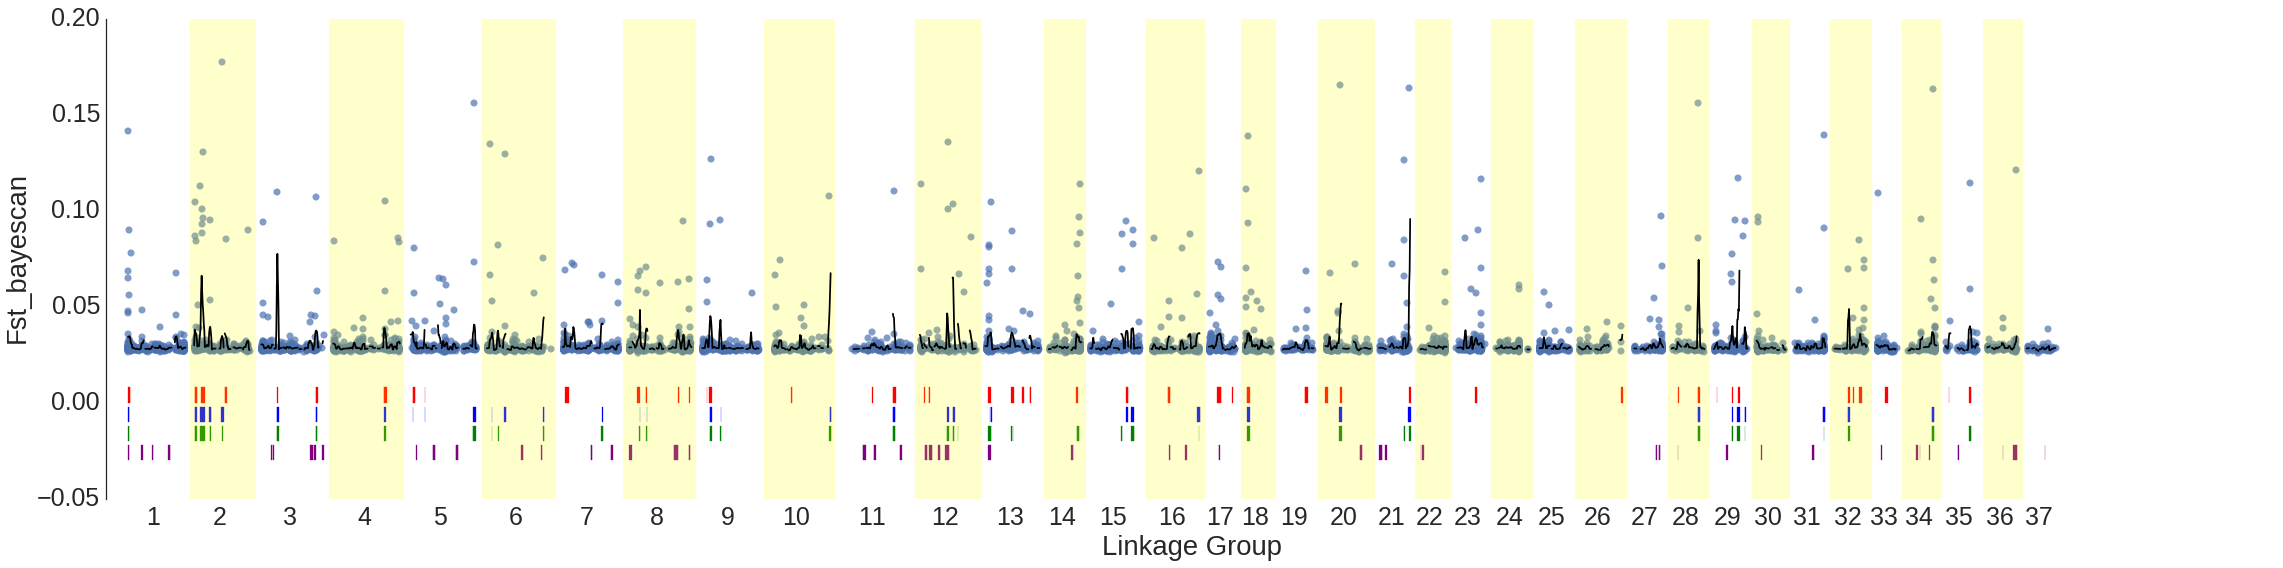

In [307]:
sns.set(font_scale=2.5, style = "white")
stat = 'Fst_bayescan'
g = sns.lmplot(data = genome_stats, x = 'cM_padded', y = stat,  fit_reg=False, sharex=False,
           legend= False, size = 8, aspect = 4, truncate = True, scatter_kws={'s':50, 'alpha':.7}, palette="Set2", 
              #hue = 'paper1_LG',
              )
g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
g.set_axis_labels('Linkage Group', stat)
sns.despine(left=False, bottom = True)

# add rolling mean of stat
plt.plot(cMs, rolling[stat+'_roll'], color = 'black')


        
# significant differnatiation regions identified by bootstrap
for idx, vals in rolling.iterrows():
    if vals['Fst_weir_roll'] >= vals['Fst_weir_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], 0),  1, .008, alpha = 1, color = 'red', label = 'Weir_Fst'))

for idx, vals in rolling.iterrows():
    if vals['mlog10(qval)_bayescan_roll'] >= vals['mlog10(qval)_bayescan_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.01),  1, .008, alpha = 1, color = 'blue', label = 'Bayescan'))
        
for idx, vals in rolling.iterrows():
    if vals['Fst_bayescan_roll'] >= vals['Fst_bayescan_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.02),  1, .008, alpha = 1, color = 'green', label = 'Bayescan_Fst'))       

for idx, vals in rolling.iterrows():
    if vals['mlog10(fdr_pval)_LFMM_roll'] >= vals['mlog10(fdr_pval)_LFMM_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.03),  1, .008, alpha = 1, color = 'purple', label = 'mlog10(fdr_pval)_LFMM'))        

currentLG = 1
for idx, LG_box_left in enumerate(genome_stats.groupby('LG')['cM_pad'].mean().values[:36]):
    box_width = np.diff(genome_stats.groupby('LG')['cM_pad'].mean().values)[idx]
    if currentLG%2 == 0:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 10, alpha = .2, color = 'yellow'))
    currentLG+=1

plt.savefig(os.path.join('paper', 'figures', 'Bayescan_Fst_and_bootstrap.png'))
plt.show()

# Stats and moving averages

In [260]:
genome_stats.head()

contig  locus  stacks_CatID stacks_SNP  LG  cM  BSname  prob_bayescan  \
0      c4311   4311         28282   28282_88   1   0    6440       0.074607   
6665  c56875  56875         39970   39970_60   1   0    6348       0.070007   
6666  c54045  54045         37579   37579_17   1   0    6197       0.069907   
6667   c2167   2167         10293    10293_9   1   0    6162       0.075208   
6668  c69918  69918         50820    50820_7   1   0    6154       0.069207   

      log10(PO)_bayescan  qval_bayescan    ...      Fst_weir  locnum  \
0                -1.0935        0.87532    ...      0.013742    6440   
6665             -1.1233        0.88464    ...      0.016345    6348   
6666             -1.1240        0.88481    ...      0.028103    6197   
6667             -1.0898        0.87376    ...      0.014312    6162   
6668             -1.1287        0.88562    ...      0.015249    6154   

        cpvals    zscore  reject_null  reject_null_LFMM  fdr_pval_LFMM  \
0     0.567927 -0.612083        False             False       0.995929   
6665  0.245650  1.244280        False             False       0.937707   
6666  0.761393 -0.325439        False             False       0.997092   
6667  0.502838  0.718105        False             False       0.995929   
6668  0.371955  0.956875        False             False       0.977007   

     mlog10(fdr_pval)_LFMM cM_pad  cM_padded  
0                 0.001772      0          0  
6665              0.027933      0          0  
6666              0.001265      0          0  
6667              0.001772      0          0  
6668              0.010102      0          0  

[5 rows x 23 columns]

In [250]:
stats = ['Fst_weir', 'Fst_bayescan',  'mlog10(qval)_bayescan', 'alpha_bayescan', 'zscore', 'mlog10(fdr_pval)_LFMM']

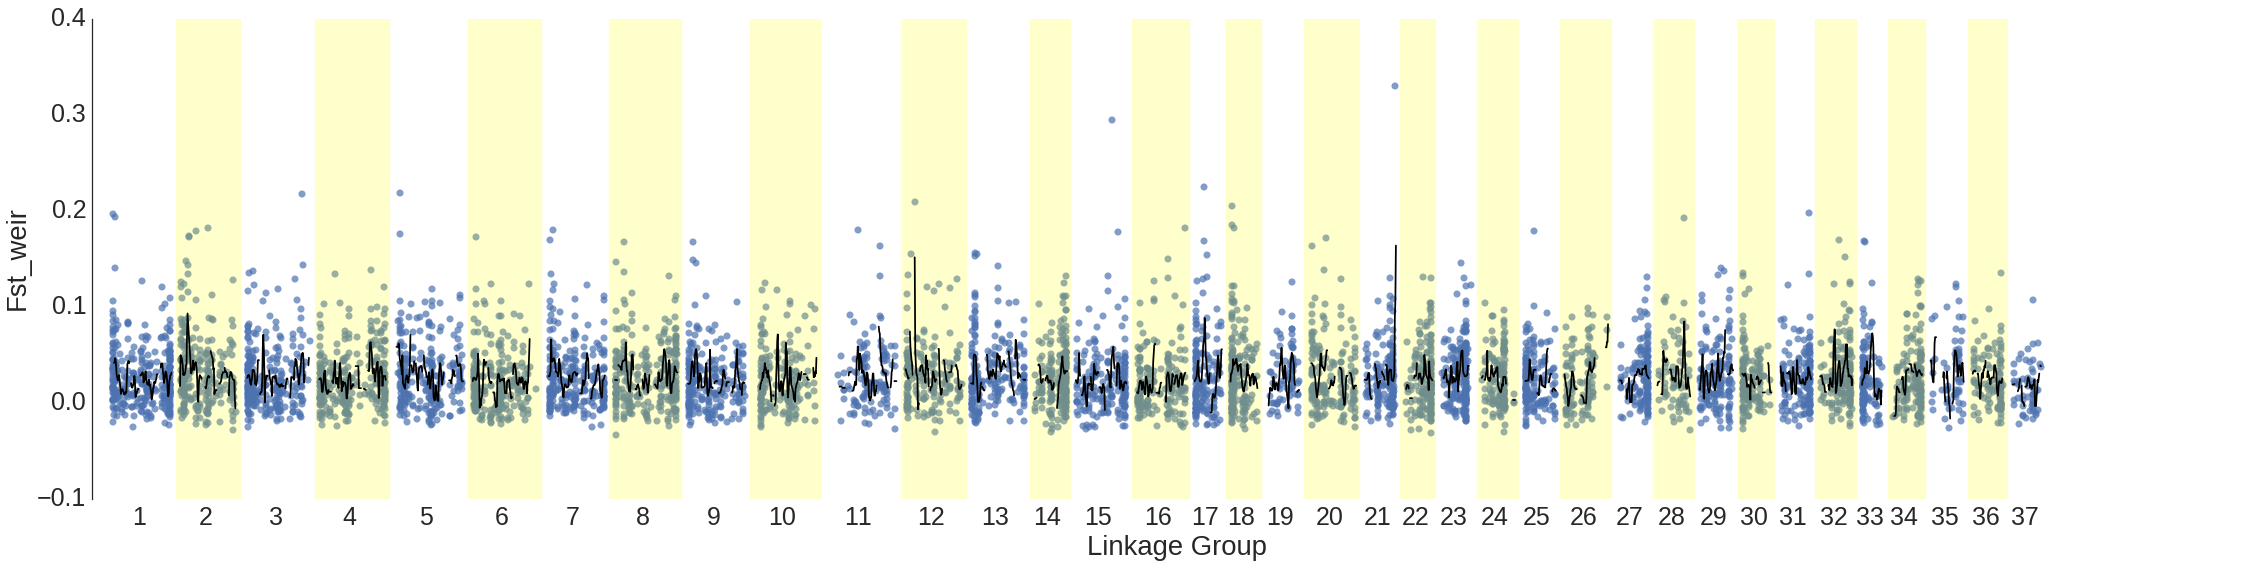

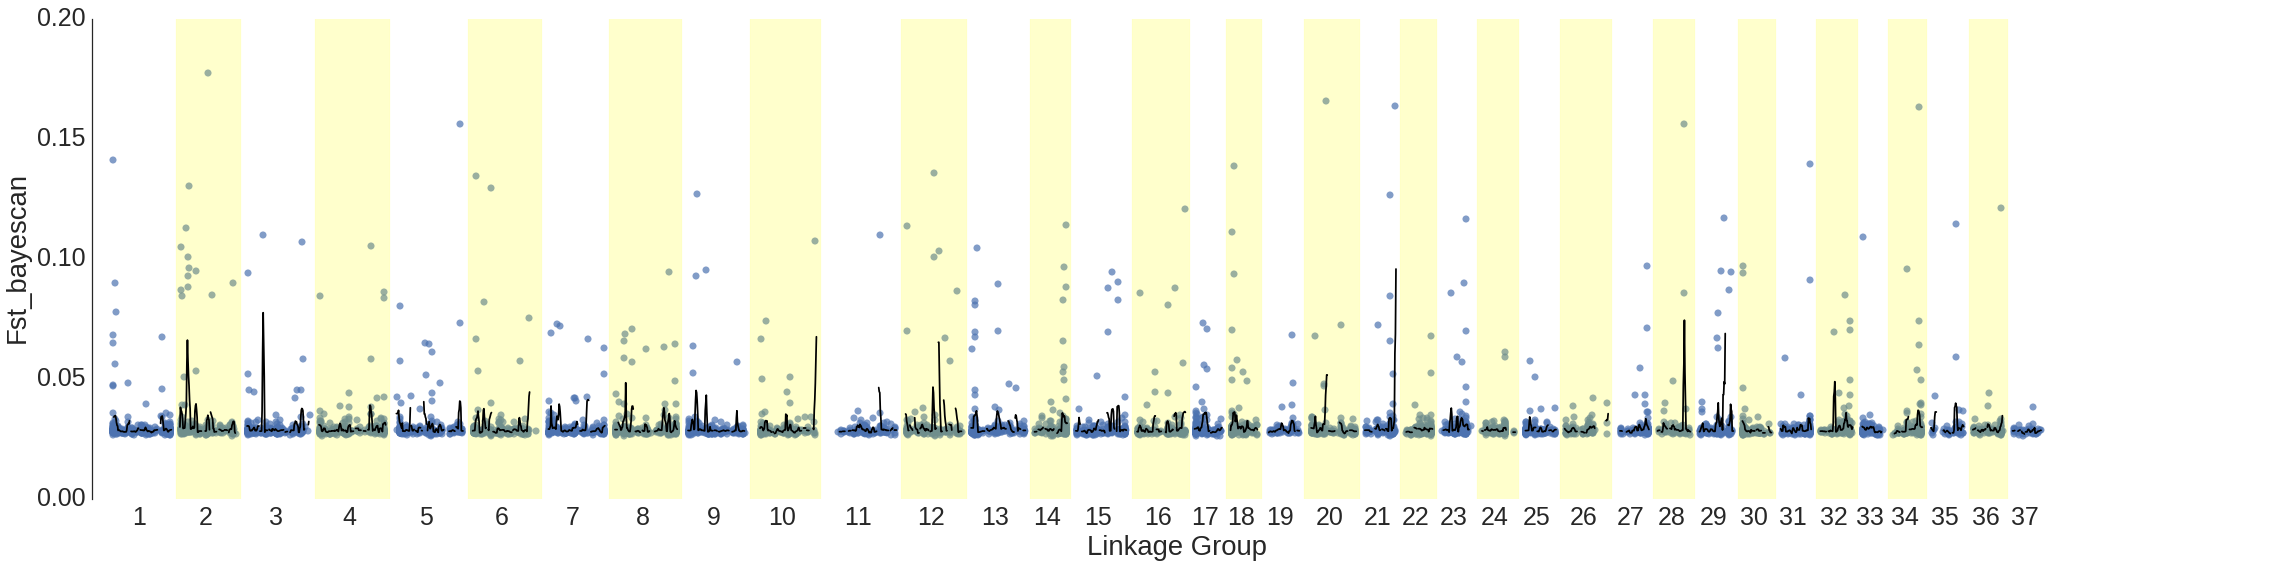

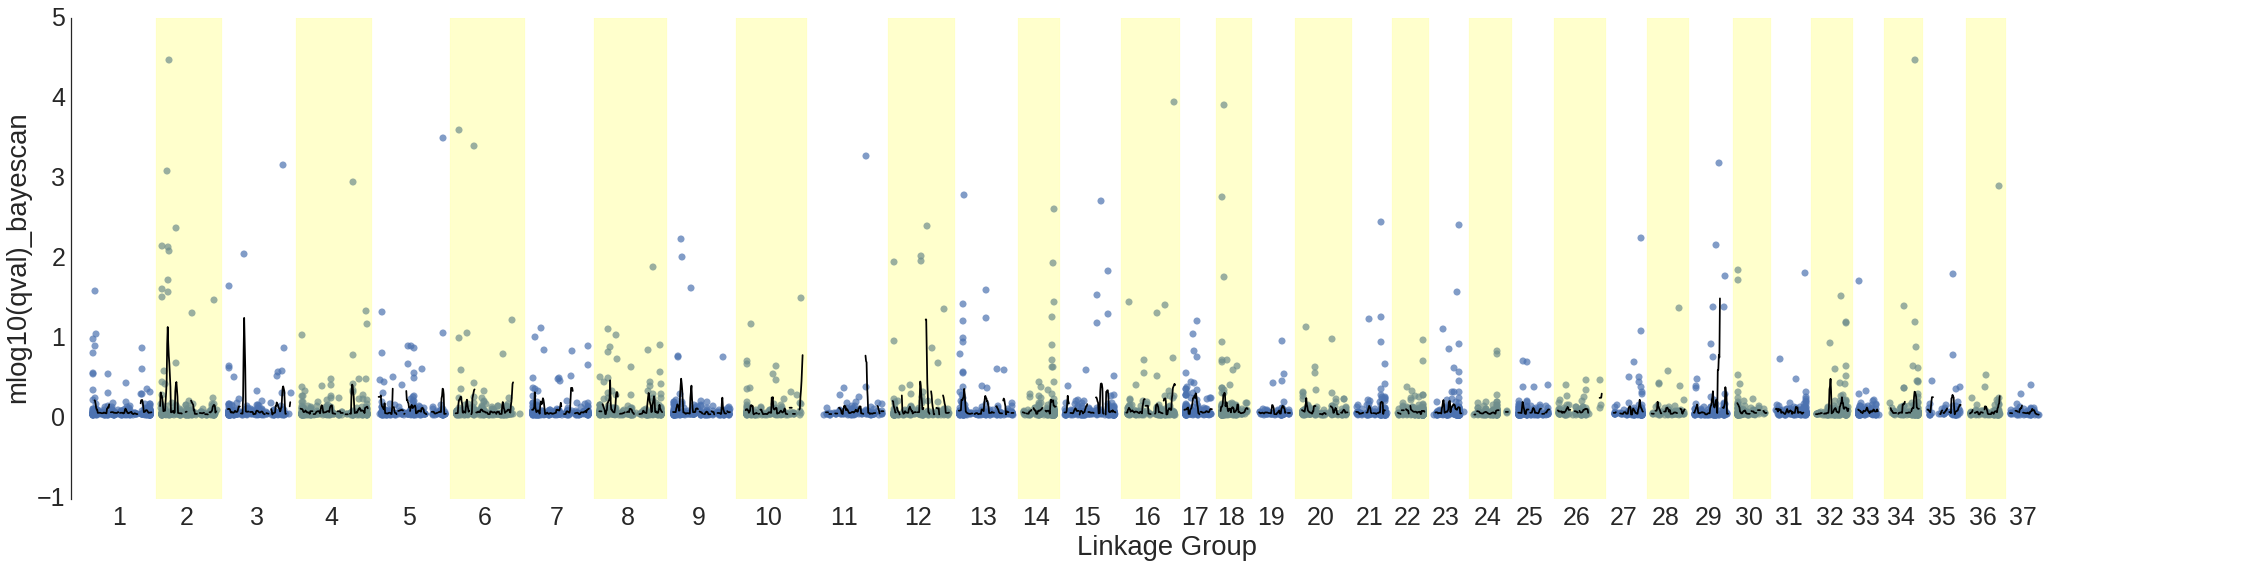

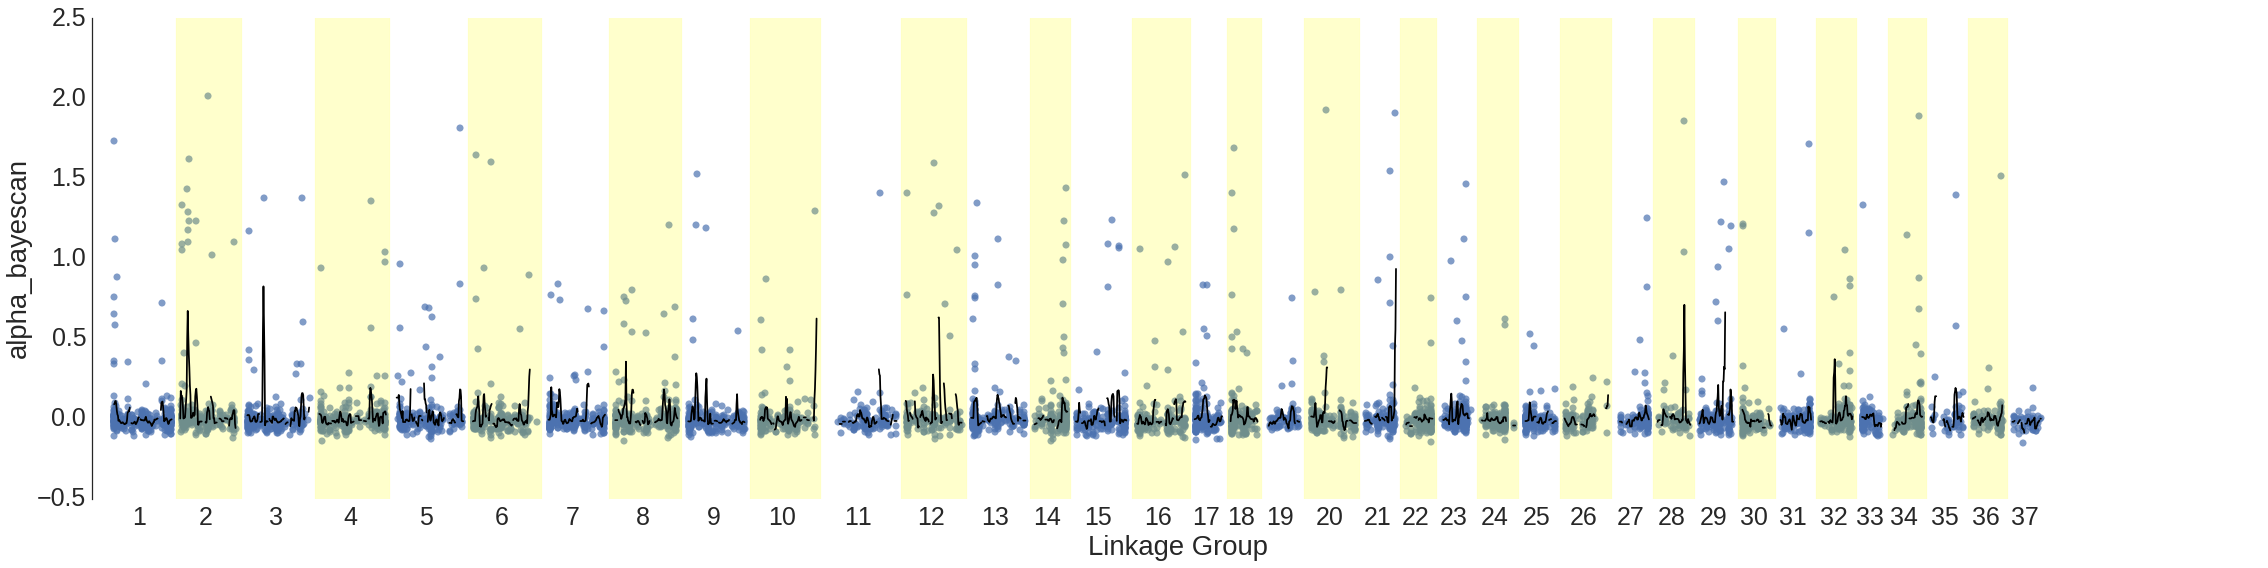

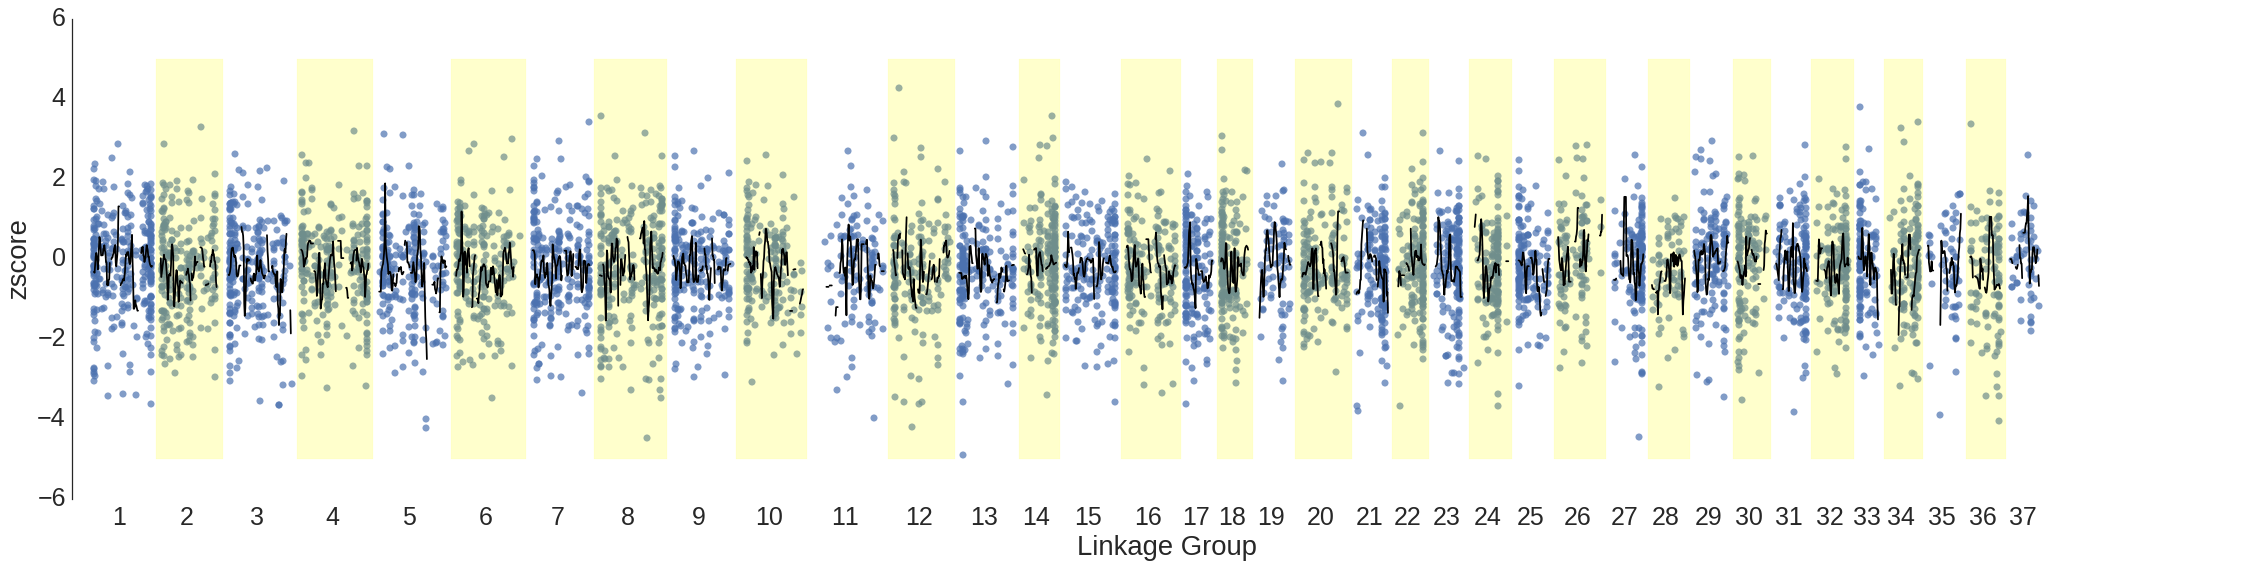

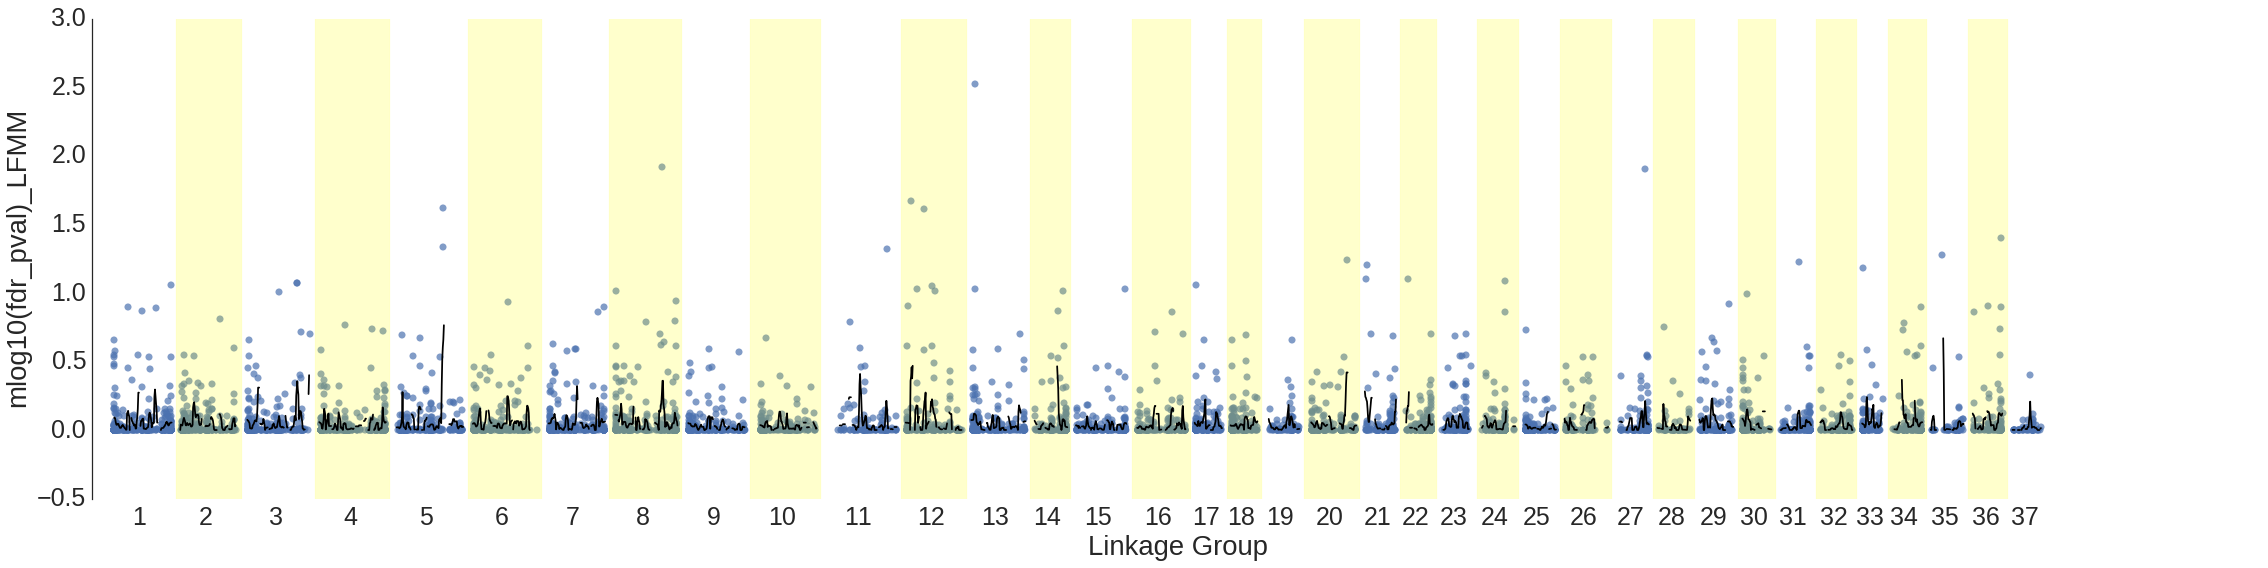

In [309]:
sns.set(font_scale=2.5, style = "white")
for stat in stats:
    g = sns.lmplot(data = genome_stats, x = 'cM_padded', y = stat,  fit_reg=False, sharex=False,
               legend= False, size = 8, aspect = 4, truncate = True, scatter_kws={'s':50, 'alpha':.7}, palette="Set2" 
                  )
    g.set(xlim=-40)
    #g.set(xticks=cumpos['cM_pad']+30, xticklabels = np.arange(1, 38))
    
    g.set(xticks=cumpos['cM_pad'][:37]-15 + np.diff(cumpos['cM_pad'])/2, xticklabels = np.arange(1, 38))
    g.set_axis_labels('Linkage Group', stat)
    sns.despine(left=False, bottom = True)

    # add rolling mean of stat
    plt.plot(cMs, rolling[stat+'_roll'], color = 'black')
    
    # add shading showing LGs
    currentLG = 1
    for idx, LG_box_left in enumerate(genome_stats.groupby('LG')['cM_pad'].mean().values[:36]):
        box_width = np.diff(genome_stats.groupby('LG')['cM_pad'].mean().values)[idx]
        if currentLG%2 == 0:
            currentAxis = plt.gca()
            currentAxis.add_patch(matplotlib.patches.Rectangle((LG_box_left-10, -5),  box_width, 10, alpha = .2, color = 'yellow'))
        currentLG+=1
    plt.savefig(os.path.join('paper', 'figures', 'supplemental', stat + '.genome_scan.png'))
    plt.show()

In [ ]:
assert False

## Plot of LEPMAP map

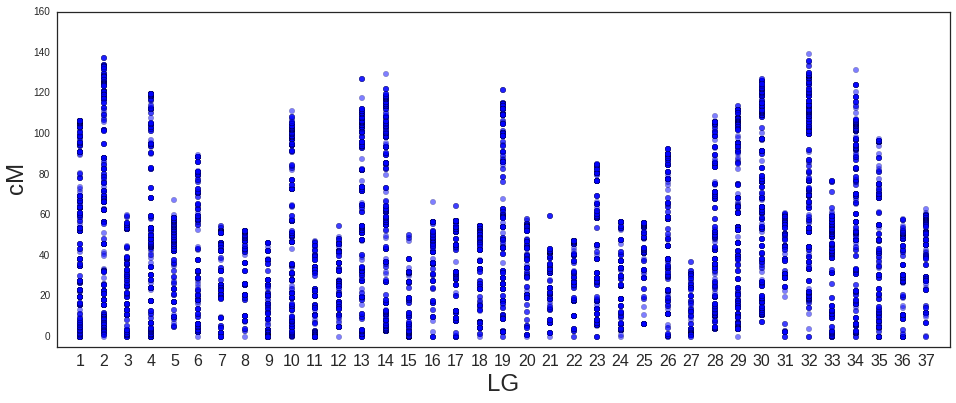

In [16]:
figsize(16, 6)

plt.scatter(x = mapped_loci.paper1_LG, y = mapped_loci['cM'], alpha = .5, s = 30, c = 'blue')
plt.xlim(0, 38); 
plt.ylim(-5); 
plt.xlabel('LG',fontsize = 24); plt.ylabel("cM",fontsize = 24)
plt.xticks(range(1, max(mapped_loci.LEP_LG)+1), fontsize = 16)
plt.show()

## WORKING HERE

In [18]:
pop_loci = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/on_map.map', 
            sep = '\t', header = None)
pop_loci.columns = ['LEP_LG', 'stacks_SNP', 'junk', 'pos']
pop_loci = pop_loci[['stacks_SNP']]
print(len(pop_loci))
pop_loci.head()

7259


stacks_SNP
0     8315_6
1    36304_6
2    41478_6
3     6516_7
4    41929_7

In [21]:
all_mapped_snps = pd.merge(pop_loci, mapped_loci, on = 'stacks_SNP')

#### notice this is a *.map file produced by the 'populations' program from Stacks, not LEPmap

In [24]:
non_paralogs_snpfile = "/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/non_paralogs.map"
non_paralog_loci = pd.read_csv(non_paralogs_snpfile, sep ="\t", header = None, comment = "#")
non_paralog_loci.columns = ['contig', 'stacks_SNP', 'ignore', 'pos']
non_paralog_loci = non_paralog_loci[['stacks_SNP']]
non_paralog_loci.head()

stacks_SNP
0     1013_6
1     2062_6
2     2574_6
3     2741_6
4     4096_6

In [27]:
mapped_non_paralogs = pd.merge(non_paralog_loci, mapped_loci, on = 'stacks_SNP')
mapped_non_paralogs.head(5)

stacks_SNP  contig resolved_locus  stacks_CatID  LEPname  LEP_LG  cM_OLD  \
0    24882_6   c3902         3902_C         24882     3907       6  101.52   
1      561_7  c10621          10621           561      140       5  128.57   
2    54726_8  c74730        74730_C         54726    10778       9   11.38   
3    54726_8  c74730        74730_E         54726    10779      33   16.67   
4    66820_8   c9054           9054         66820    11873      36   51.31   

   paper1_LG      cM  
0         34  101.52  
1          2    8.89  
2         29  102.52  
3         27   20.11  
4         36   51.31

### plot mapped SNPs that we observe in the population data

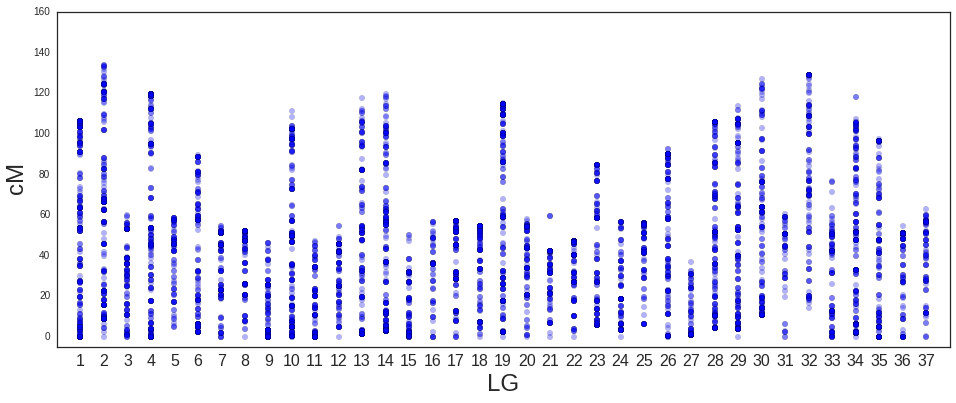

In [30]:
plt.scatter(x = mapped_non_paralogs.paper1_LG, y = mapped_non_paralogs.cM, alpha = .3, s = 30, c = 'blue')
plt.xlim(0, 38); 
plt.ylim(-5); 
plt.xlabel('LG',fontsize = 24); plt.ylabel("cM",fontsize = 24)
plt.xticks(range(1, max(mapped_non_paralogs.paper1_LG)+1), fontsize = 16)
plt.show()

### First look at Fst across the genome

In [31]:
pop_fst = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.fst', sep= '\t')
pop_fst.rename(columns = {'SNP':'stacks_SNP'}, inplace=True)
pop_fst.head()

CHR stacks_SNP  POS  NMISS       FST
0    0     1013_6    6    168  0.015589
1    0     2062_6    6    171 -0.002161
2    0     2574_6    6    169  0.017541
3    0     2741_6    6    166 -0.005708
4    0     4096_6    6    169  0.010227

In [ ]:
map_pop_fst = pd.merge(mapped_non_paralogs, pop_fst, on = 'stacks_SNP')

In [47]:
bayescan_results = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/mapped_bayescan.txt', sep = "\t")
bayescan_results.head()

stacks_SNP  BSname       fst  log10(PO)     qval
0     1013_6       1  0.027249   -1.05241  0.85034
1     2062_6       2  0.026264   -0.88871  0.67027
2     2574_6       3  0.027457   -1.15920  0.88696
3     2741_6       4  0.026212   -0.90172  0.69108
4     4096_6       5  0.027189   -1.02750  0.83277

In [49]:
map_fst = pd.merge(map_pop_fst, bayescan_results, on = 'stacks_SNP')
map_fst.shape

(6251, 17)

In [53]:
map_fst.rename(columns = {'FST':'WC_Fst', 'fst':'BS_Fst'}, inplace = True)
map_fst.to_csv('/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/map_fst.txt', sep = "\t", index = False)
map_fst.head()

stacks_SNP  contig resolved_locus  stacks_CatID  LEPname  LEP_LG  cM_OLD  \
0      561_7  c10621          10621           561      140       5  128.57   
1    66820_8   c9054           9054         66820    11873      36   51.31   
2    39412_9  c56204          56204         39412     7242       5  127.73   
3   31566_11  c46960          46960         31566     5348      13    6.66   
4   38281_11  c54870          54870         38281     6932      13    4.69   

   paper1_LG     cM  CHR  POS  NMISS    WC_Fst  BSname    BS_Fst  log10(PO)  \
0          2   8.89    2    7    167 -0.003770      65  0.026871   -1.01000   
1         36  51.31   36    8    168 -0.001607     186  0.026625   -0.95997   
2          2   9.73    2    9    158  0.028033     221  0.027779   -1.11930   
3         35   6.66   35   11    158 -0.020896     348  0.026515   -0.95899   
4         35   4.69   35   11    165  0.019863     353  0.027615   -1.13960   

      qval  
0  0.81994  
1  0.77155  
2  0.88069  
3  0.77000  
4  0.88462

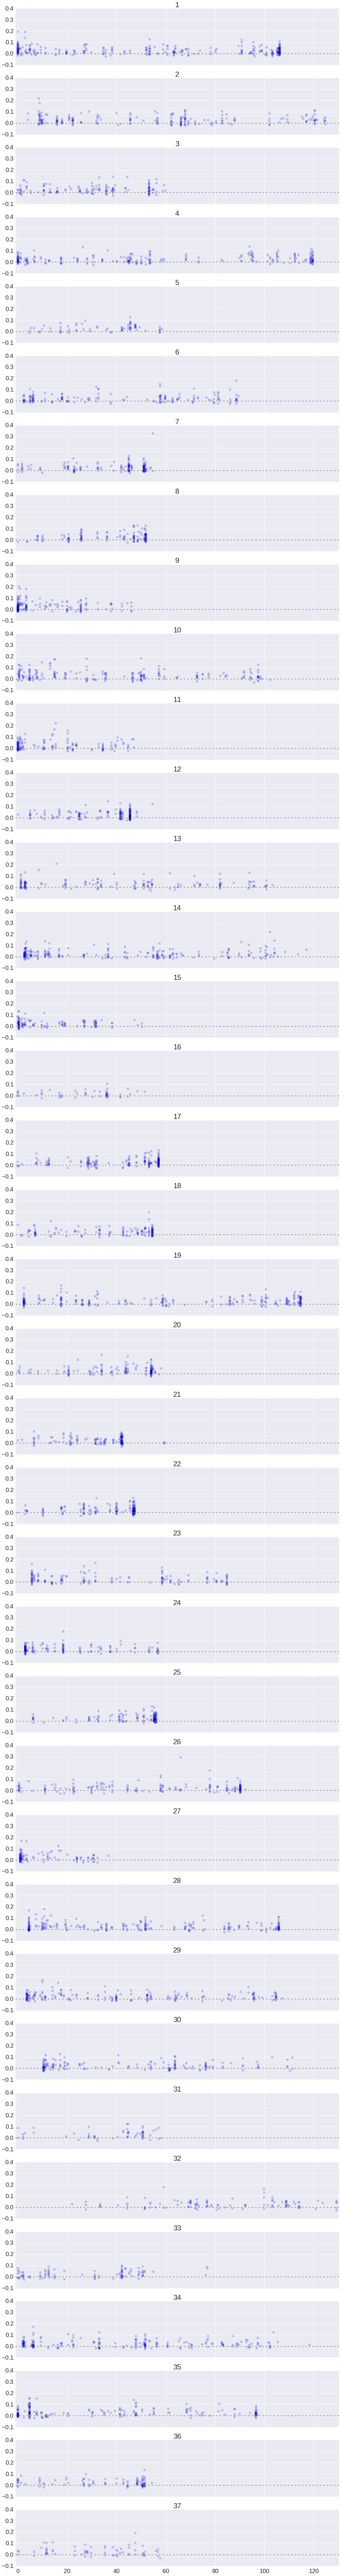

In [43]:
sns.set(font_scale=2)
figsize(16, 120)

fig, axarr = plt.subplots(nrows = 37, sharey=True, sharex=True)
for idx, LG in enumerate(set(map_pop_fst.paper1_LG)):
    LG_data = map_pop_fst[map_pop_fst.paper1_LG == LG]
    axarr[idx].scatter(x=LG_data.cM, y=LG_data.FST , alpha = .2, s = 60)
    axarr[idx].axhline(c= 'grey',ls = '--')
    axarr[idx].set_title(LG)

plt.xlim(-1, max(map_pop_fst.cM)+1)
plt.tight_layout()
plt.show()    

In [ ]:
### similar in seaborn

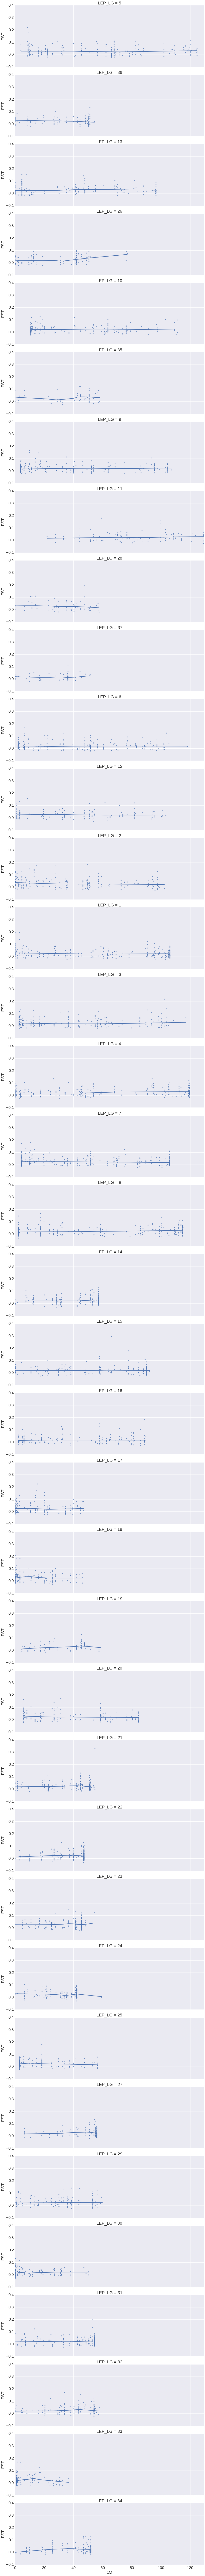

In [44]:
%matplotlib inline
# lowess fits are too broad
g = sns.FacetGrid(map_pop_fst, row="LEP_LG", size=5, aspect = 3)
g.map(sns.regplot, 'cM', 'FST', ci = 95, scatter = True, lowess = True, truncate= True)
g.set(xlim=(0, max(map_pop_fst.cM)))

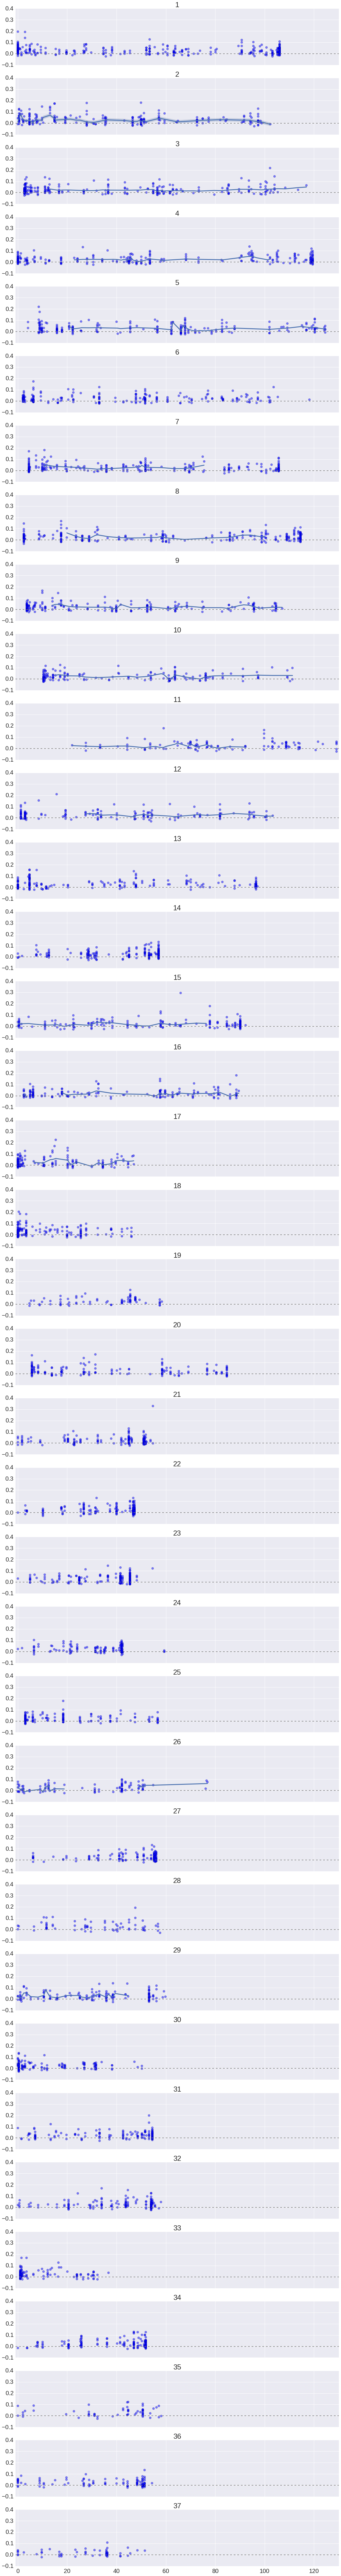

In [45]:
%matplotlib inline
import statsmodels.api as sm
figsize(16, 120)
# some code adapted from:
#http://nbviewer.ipython.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/811585624e843f3f80b9b6fe89e18119d7d2d73c/dplyr_pandas.ipynb

fig, axarr = plt.subplots(nrows = 37, sharey=True, sharex=True)
for idx, LG in enumerate(set(map_pop_fst.LEP_LG)):
    LG_data = map_pop_fst[map_pop_fst.LEP_LG == LG]
    smooth = sm.nonparametric.lowess( LG_data.FST, LG_data.cM, frac=.1)
    axarr[idx].plot(smooth[:, 0], smooth[:, 1], linewidth=3);
    std = smooth[:, 1].std()
    axarr[idx].fill_between(smooth[:, 0], smooth[:, 1] - std, smooth[:, 1] + std, alpha=.25);
    axarr[idx].scatter(x=LG_data.cM, y=LG_data.FST , alpha = .5, s = 60)
    axarr[idx].axhline(c= 'grey',ls = '--')
    axarr[idx].set_title(LG)

plt.xlim(-1, max(map_pop_fst.cM)+1)
plt.tight_layout()
plt.show()

In [159]:
sm.nonparametric.lowess(map_pop_fst.FST, map_pop_fst.cM, =1)

array([[  0.00000000e+00,   2.17126403e-02],
       [  0.00000000e+00,   2.17126403e-02],
       [  0.00000000e+00,   2.17126403e-02],
       ..., 
       [  1.45030000e+02,   2.27927507e-02],
       [  1.45030000e+02,   2.27927507e-02],
       [  1.53200000e+02,   2.29106823e-02]])

## Look at overlap

In [17]:
LEPmap_v_pop = pd.merge(pop_snps, mapnames, on = 'match', how = 'inner')
LEPmap_v_pop.head()

NameError: name 'mapnames' is not defined

In [ ]:
LEPmap_v_pop_to_print = LEPmap_v_pop[['stacks_SNP', 'contig', 'LEP_LG']]

LEPmap_v_pop_to_print.to_csv('/home/ipseg/Desktop/waples/chum_populations/data/batch_4/lep_v_pop.txt', 
                                             sep = "\t", index = False)

In [7]:
## Retained in populations after filtering

In [18]:
retained_pop_snpfile = "/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/final.snplist"
retained_pop_snps = pd.read_csv(retained_pop_snpfile, sep = "\t", header = None)
retained_pop_snps.columns = ['stacks_SNP']
retained_pop_snps.head()

stacks_SNP
0     1013_6
1     2062_6
2     2574_6
3     2741_6
4     4096_6

In [6]:
retained = pd.merge(LEPmap_v_pop, retained_pop_snps)
print(retained.shape)
retained.head()

(1926, 8)


contig stacks_SNP  ignore  pos  match  lepname  mapname  LG
0  c10001       2_70       0   70  10001        1    10001  10
1  c10068      63_53       0   53  10068       15  10068_A  37
2  c10068      63_53       0   53  10068       16  10068_B   9
3  c10081      76_65       0   65  10081       18    10081   1
4  c10098      90_75       0   75  10098       24    10098  17

In [7]:
chum_08_map_filename = '/olympus/WORK/WAPLES/Stacks_mapping/Chum_data/consensus/chum_08_PSV_map_ALIGNED.tsv'
chum_08_map = pd.read_csv(chum_08_map_filename, sep = "\t", header = None)
chum_08_map.columns = ['LG', 'SNPx', 'cM']
chum_08_map['match'] = [xx[0] for xx in chum_08_map['SNPx'].str.split("_") ]

pd.merge(pop_snps, chum_08_map).head()

contig stacks_SNP  ignore  pos  match  LG      SNPx       cM
0  c10001       2_70       0   70  10001  29  10001_x1    4.986
1  c10068      63_53       0   53  10068  28  10068_x2  111.654
2  c10068      63_53       0   53  10068  15  10068_x1   55.225
3  c10081      76_65       0   65  10081   0  10081_x1   67.785
4  c10106     100_35       0   35  10106   0  10106_x1   77.872

In [16]:
aa = pd.merge(mapnames, chum_08_map, on =['match'])
aa = aa[aa['match'] != 'Oke']
bb = pd.merge(aa, pop_snps)
bb = bb.drop_duplicates(['lepname'])
bb.head()
bb.shape

(1429, 11)

In [9]:
!pwd

/home/ipseg/Desktop/waples/chum_populations
